In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import scipy
import math
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.signal import savgol_filter #Smooth

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8, n_col =1,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False,ncol=n_col)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [3]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO

In [4]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


In [5]:
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

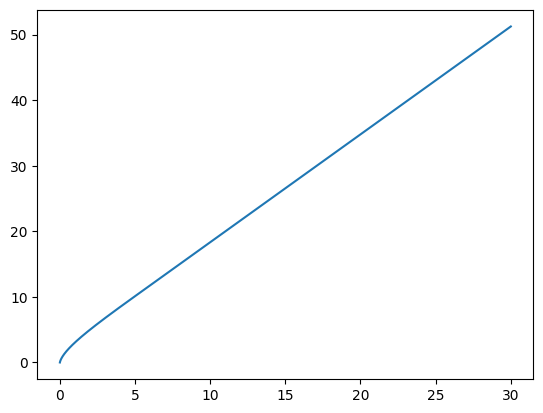

In [6]:
LO_range= np.arange(0,30,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [7]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    return Bin_center, hist

In [8]:
data_5MeV_raw=[]
#path = "../../../../data/GTTOF_NSTOF_comparison/GTTOF_5.0MeV/"
path = "../../../../data/GTTOF_NSTOF_comparison/NSTOF_GTTOF_5.0MeV/"
for i in np.arange(1,32,1):
    if i ==1:
        data_5MeV_raw = np.loadtxt(path+"/202306_EJ309_NS_GTTOF_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_5MeV_raw_temp = np.loadtxt(path+"/202306_EJ309_NS_GTTOF_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_5MeV_raw = np.vstack((data_5MeV_raw,data_5MeV_raw_temp))
        #print(data_6MeV.shape)

In [9]:
data_5MeV = pd.DataFrame(data_5MeV_raw,columns=["core","counts","particle","Tri_G_LO","Tri_P_LO","n_E","Rec_n_LO"])
print(data_5MeV.head())

   core  counts  particle  Tri_G_LO  Tri_P_LO       n_E  Rec_n_LO
0   1.0     1.0     200.0   0.00000  1.164860  1.072750  0.118914
1   1.0     2.0       4.0   4.86496  0.000000  4.595820  0.578128
2   1.0     3.0     600.0   0.00000  1.691180  0.001238  0.000045
3   1.0     4.0     100.0   0.00000  0.539523  3.016390  0.492224
4   1.0     5.0     100.0   0.00000  0.644025  2.758590  0.110234


In [10]:
200%100


0

In [31]:
mask_tri_gamma   = data_5MeV["particle"]<99
mask_tri_neutron = data_5MeV["particle"]%100<0.5

mask_GTTOF_tri_LO_th = data_5MeV["Tri_G_LO"]>0.125
mask_GTTOF_rec_LO_th = data_5MeV["Rec_n_LO"]>0.125

mask_NSTOF_tri_LO_th = data_5MeV["Tri_P_LO"]>0.5
mask_NSTOF_rec_LO_th = data_5MeV["Rec_n_LO"]>0.1

data_GTTOF = data_5MeV[(mask_tri_gamma
                        &mask_GTTOF_tri_LO_th
                        & mask_GTTOF_rec_LO_th)]
data_NSTOF = data_5MeV[(mask_tri_neutron
                        & mask_NSTOF_tri_LO_th
                        & mask_NSTOF_rec_LO_th)]



In [38]:
print(data_GTTOF)

       core  counts  particle  Tri_G_LO  Tri_P_LO      n_E  Rec_n_LO
1       1.0     2.0       4.0   4.86496       0.0  4.59582  0.578128
32      1.0    33.0       2.0   3.41600       0.0  5.00000  0.590091
48      1.0    49.0       5.0   5.84568       0.0  5.00000  1.479470
55      1.0    56.0       3.0   4.87146       0.0  5.00000  1.212650
58      1.0    59.0       1.0   2.30334       0.0  5.00000  1.390910
...     ...     ...       ...       ...       ...      ...       ...
39081  31.0  1224.0       2.0   4.23159       0.0  5.00000  0.448698
39094  31.0  1237.0       1.0   3.74976       0.0  5.00000  1.126250
39116  31.0  1259.0       2.0   3.08840       0.0  5.00000  1.191410
39140  31.0  1283.0       1.0   2.46011       0.0  5.00000  1.953290
39142  31.0  1285.0       2.0   3.41600       0.0  5.00000  0.595385

[3038 rows x 7 columns]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


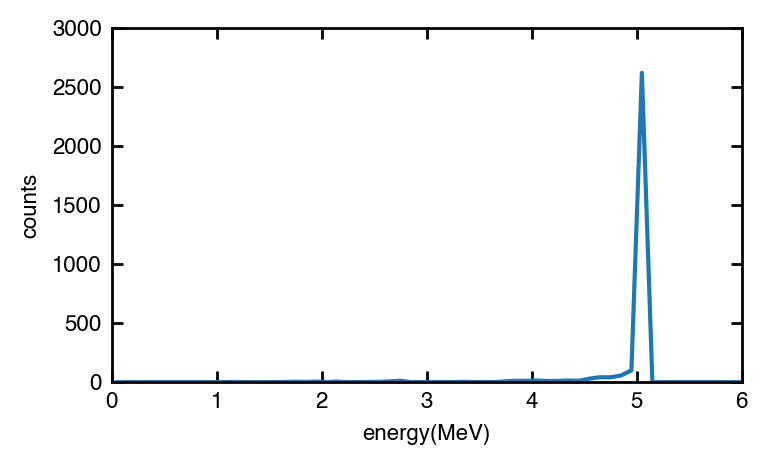

In [32]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(data_GTTOF['n_E'],100,0,10)
plt.plot(axis,y_AmBe)

fig_post_def(xlim=(0,6),ylim=(0,3000),xlabel="energy(MeV)",ylabel="counts")

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  6.15669889e+00
  6.15676029e+00  6.15682170e+00]


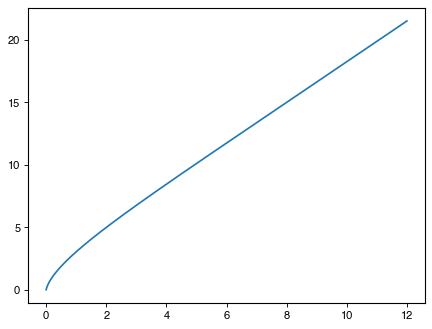

In [33]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
enegy_range= np.arange(0,12,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)
LO_range= np.arange(0,12,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [34]:
prodata_NSTOF = data_NSTOF.copy()
prodata_NSTOF["Recoil_p_E"] = prodata_NSTOF["Tri_P_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
#prodata_NSTOF["Total_E"]    = prodata_NSTOF["n_E"]+prodata_NSTOF["Recoil_p_E"]
prodata_NSTOF["Total_E_LO"] = prodata_NSTOF["n_E"]+prodata_NSTOF["Recoil_p_E"]

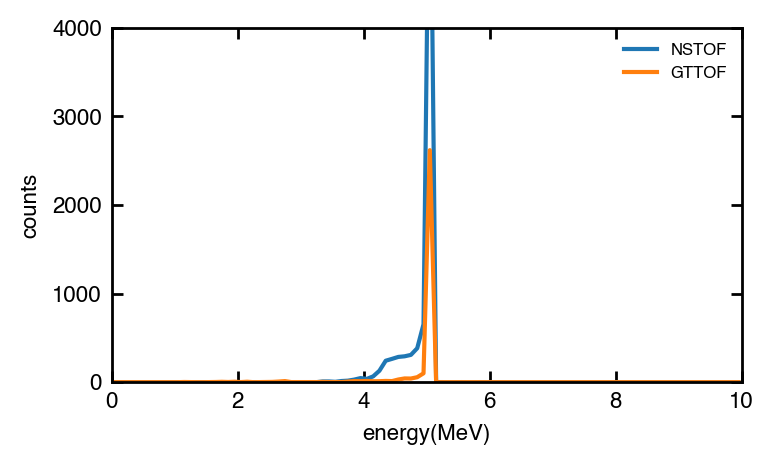

In [35]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,NSTOF_y=sorting(prodata_NSTOF['Total_E_LO'],100,0,10)
#axis,NSTOF_y=sorting(prodata_NSTOF['Recoil_p_E'],300,0,30)

plt.plot(axis,NSTOF_y,label="NSTOF")
plt.plot(axis,y_AmBe,label="GTTOF")
fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



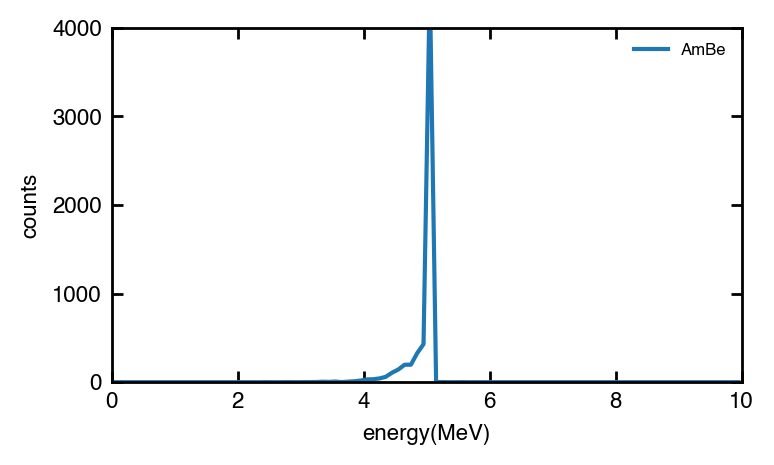

In [16]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,NSTOF_y=sorting(prodata_NSTOF['Total_E_LO'],100,0,10)
#axis,NSTOF_y=sorting(prodata_NSTOF['Recoil_p_E'],300,0,30)

plt.plot(axis,NSTOF_y,label="AmBe")

fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



In [17]:
data_4MeV=[]
#path = "../../../../data/GTTOF_NSTOF_comparison/GTTOF_5.0MeV/"
path = "../../../../data/GTTOF_NSTOF_comparison/GTTOF_5.0MeV/"
for i in np.arange(1,32,1):
    if i ==1:
        data_4MeV = np.loadtxt(path+"/202304_EJ309_GTTOF_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_4MeV_temp = np.loadtxt(path+"/202304_EJ309_GTTOF_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_4MeV = np.vstack((data_4MeV,data_4MeV_temp))
        #print(data_6MeV.shape)

In [18]:
print("Core||","counts||", "gamma Lightoutput in trigger||","gamma deposit energy in trigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(data_4MeV)
print(data_4MeV.shape)


Core|| counts|| gamma Lightoutput in trigger|| gamma deposit energy in trigger|| neutron_energy on surface|| LO_in_n_detector||
[[1.00000e+00 1.00000e+00 4.86496e+00 4.86496e+00 4.59582e+00 5.78128e-01]
 [1.00000e+00 2.00000e+00 9.91190e-02 9.91190e-02 4.69039e+00 2.76358e-01]
 [1.00000e+00 3.00000e+00 4.08391e+00 4.08391e+00 3.99150e+00 4.42594e-03]
 ...
 [3.10000e+01 1.94000e+02 3.08840e+00 3.08840e+00 5.00000e+00 1.19141e+00]
 [3.10000e+01 1.95000e+02 2.46011e+00 2.46011e+00 5.00000e+00 1.95329e+00]
 [3.10000e+01 1.96000e+02 3.41600e+00 3.41600e+00 5.00000e+00 5.95385e-01]]
(6246, 6)


In [19]:
prodata_4MeV_temp = data_4MeV[data_4MeV[:,2]>0.125]
prodata_4MeV = prodata_4MeV_temp[prodata_4MeV_temp[:,5]>0.125]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


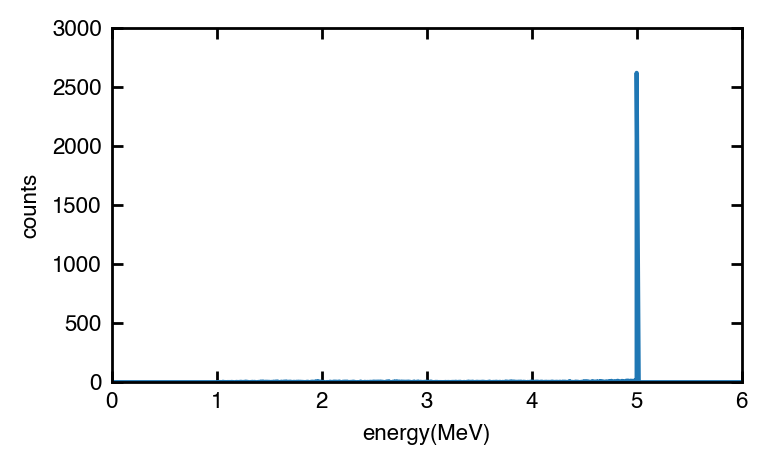

In [20]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(prodata_4MeV[:,4],1000,0,10)
plt.plot(axis,y_AmBe)

fig_post_def(xlim=(0,6),ylim=(0,3000),xlabel="energy(MeV)",ylabel="counts")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


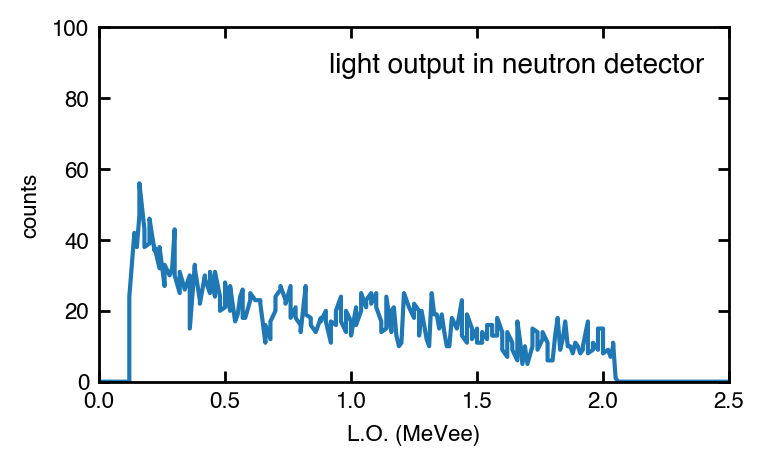

In [21]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(prodata_4MeV[:,5],500,0,5)
plt.plot(axis,y_AmBe)

fig_post_def(xlim=(0,2.5),ylim=(0,100),title="light output in neutron detector",lg_fs=10,xlabel="L.O. (MeVee)",ylabel="counts")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


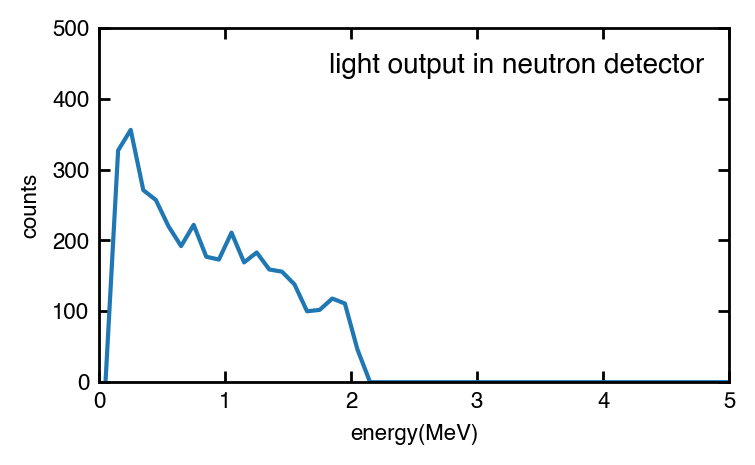

In [22]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(prodata_4MeV[:,5],300,0,30)
plt.plot(axis,y_AmBe)

fig_post_def(xlim=(0,5),ylim=(0,500),title="light output in neutron detector",lg_fs=10,xlabel="energy(MeV)",ylabel="counts")


In [23]:
print(len(prodata_4MeV[:,0]))

3688


In [24]:
NSTOF_data_6MeV=[]
path = "../../../../data/GTTOF_NSTOF_comparison/NSTOF_5.0MeV/"
for i in np.arange(1,32,1):
    if i ==1:
        NSTOF_data_6MeV = np.loadtxt(path+"/202302_EJ309_N_scatter_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        NSTOF_data_6MeV_temp = np.loadtxt(path+"/202302_EJ309_N_scatter_exp_60deg_2E9_All_in_one_5.0MeV_"+str(int(i))+".txt")
        NSTOF_data_6MeV = np.vstack((NSTOF_data_6MeV,NSTOF_data_6MeV_temp))
        #print(data_6MeV.shape)
print("Core||","counts||", "neutorn Lightoutput in trigger||","gamma deposit energy in trigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
print(NSTOF_data_6MeV)
print(NSTOF_data_6MeV.shape)


Core|| counts|| neutorn Lightoutput in trigger|| gamma deposit energy in trigger|| neutron_energy on surface|| LO_in_n_detector||
[[1.00000e+00 1.00000e+00 8.14595e-01 2.63904e+00 2.36239e+00 4.17686e-01]
 [1.00000e+00 2.00000e+00 6.90687e-01 2.35377e+00 2.45286e+00 3.46272e-02]
 [1.00000e+00 3.00000e+00 1.96866e-01 9.88443e-01 4.01209e+00 5.60663e-01]
 ...
 [3.10000e+01 1.12900e+03 6.90247e-01 2.41535e+00 2.53945e-01 1.34619e-02]
 [3.10000e+01 1.13000e+03 1.79996e+00 4.62559e+00 3.76914e-01 1.91463e-03]
 [3.10000e+01 1.13100e+03 1.73041e+00 4.75980e+00 2.42777e-01 1.15551e-02]]
(35612, 6)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


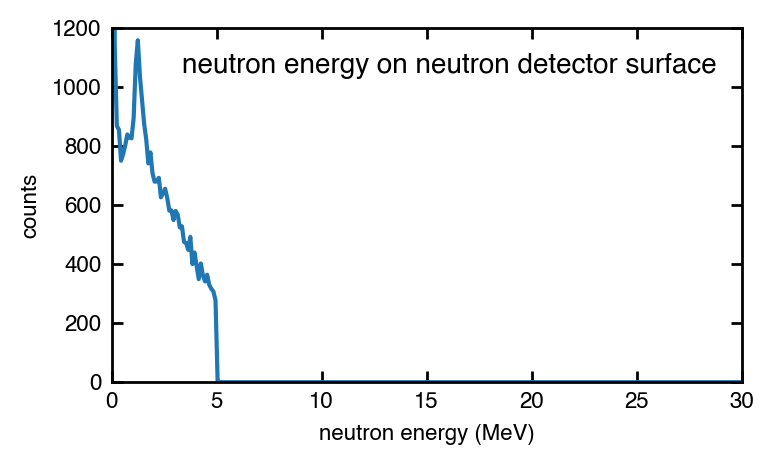

In [25]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(NSTOF_data_6MeV[:,4],300,0,30)
plt.plot(axis,y_AmBe)

fig_post_def(xlim=(0,30),ylim=(0,1200),title="neutron energy on neutron detector surface",lg_fs=10,xlabel="neutron energy (MeV)",ylabel="counts")


In [26]:
NSTOF_data_6MeV_LO=[]
for i in np.arange(0,len(NSTOF_data_6MeV[:,2]),1):
    index = int(NSTOF_data_6MeV[i,2]*100000)
    data_LO_temp = np.append(NSTOF_data_6MeV[i,:],P_Energy_inter[index])
    if i ==0: NSTOF_data_6MeV_LO = data_LO_temp.copy()
    else:     NSTOF_data_6MeV_LO = np.vstack((NSTOF_data_6MeV_LO,data_LO_temp))

In [27]:
data_6MeV_LO_selected = NSTOF_data_6MeV_LO[NSTOF_data_6MeV_LO[:,2]>0.2]
data_6MeV_LO_selected = data_6MeV_LO_selected[data_6MeV_LO_selected[:,5]>0.35]

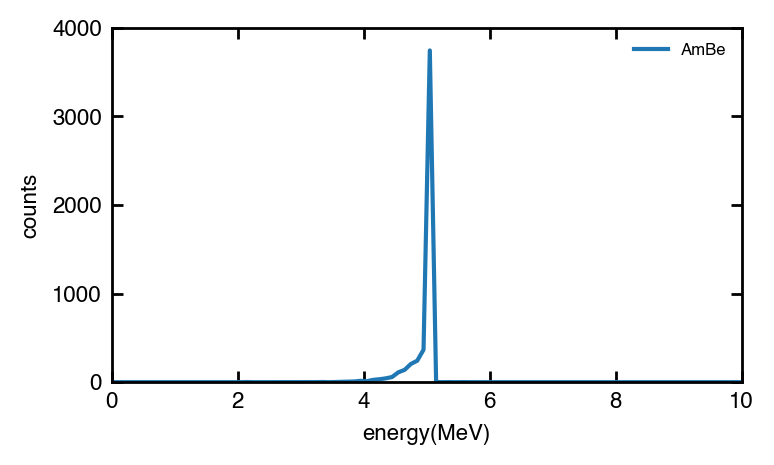

In [28]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_6MeV_LO_selected[:,6]+data_6MeV_LO_selected[:,4],300,0,30)

plt.plot(axis,y_AmBe,label="AmBe")

fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



In [29]:
print(len(data_6MeV_LO_selected[:,0]))

5027


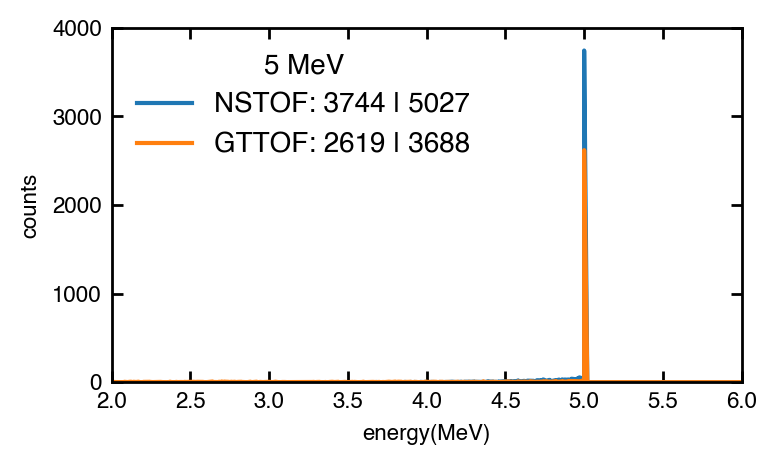

In [30]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis_NSTOF,y_NSTOF=sorting(data_6MeV_LO_selected[:,6]+data_6MeV_LO_selected[:,4],1000,0,10)
axis_GTTOF,y_GTTOF=sorting(prodata_4MeV[:,4],1000,0,10)
plt.plot(axis_NSTOF,y_NSTOF,label="NSTOF: "+str(max(y_NSTOF))+" | "+str(sum(y_NSTOF)))
plt.plot(axis_GTTOF,y_GTTOF,label="GTTOF: "+str(max(y_GTTOF))+" | "+str(sum(y_GTTOF)))
fig_post_def(xlim=(2,6),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts",title = "5 MeV",lg_fs=10)



In [22]:
output_AmBe_simulation = axis[:,np.newaxis]
output_AmBe_simulation = np.column_stack((output_AmBe_simulation,y_AmBe[:,np.newaxis]))

In [23]:
np.savetxt("Simulated_N_TOF.txt",output_AmBe_simulation)

In [111]:
data_3MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_3MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
    else:
        data_3MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
        data_3MeV = np.vstack((data_3MeV,data_3MeV_temp))

In [11]:
data_4MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_4MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
    else:
        data_4MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
        data_4MeV = np.vstack((data_4MeV,data_4MeV_temp))

In [15]:
data_5MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_5MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_5MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_5MeV = np.vstack((data_5MeV,data_5MeV_temp))

In [22]:
data_6MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_6MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
    else:
        data_6MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
        data_6MeV = np.vstack((data_6MeV,data_6MeV_temp))

In [29]:
data_7MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_7MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
    else:
        data_7MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
        data_7MeV = np.vstack((data_7MeV,data_7MeV_temp))

In [59]:
data_8MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_8MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
    else:
        data_8MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
        data_8MeV = np.vstack((data_8MeV,data_8MeV_temp))

In [86]:
data_9MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_9MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
    else:
        data_9MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
        data_9MeV = np.vstack((data_9MeV,data_9MeV_temp))

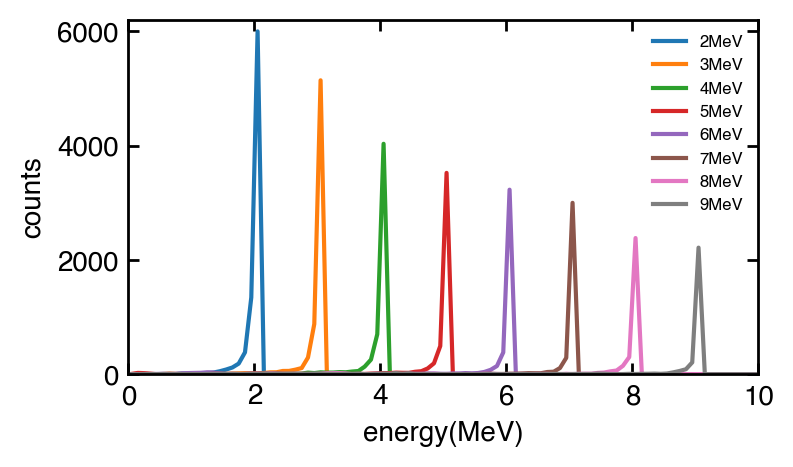

In [91]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3]+data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3]+data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3]+data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3]+data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3]+data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3]+data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3]+data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3]+data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,6200),xlabel="energy(MeV)",ylabel="counts")

In [71]:
P_Energy_inter[9041]

0.5702714291205089

In [74]:
data_2MeV_LO=[]
for i in np.arange(0,len(data_2MeV[:,2]),1):
    index = int(data_2MeV[i,2]*100000)
    data_LO_temp = np.append(data_2MeV[i,:],P_Energy_inter[index])
    if i ==0: data_2MeV_LO = data_LO_temp.copy()
    else:     data_2MeV_LO = np.vstack((data_2MeV_LO,data_LO_temp))

In [75]:
data_3MeV_LO=[]
for i in np.arange(0,len(data_3MeV[:,2]),1):
    index = int(data_3MeV[i,2]*100000)
    data_LO_temp = np.append(data_3MeV[i,:],P_Energy_inter[index])
    if i ==0: data_3MeV_LO = data_LO_temp.copy()
    else:     data_3MeV_LO = np.vstack((data_3MeV_LO,data_LO_temp))

In [76]:
data_4MeV_LO=[]
for i in np.arange(0,len(data_4MeV[:,2]),1):
    index = int(data_4MeV[i,2]*100000)
    data_LO_temp = np.append(data_4MeV[i,:],P_Energy_inter[index])
    if i ==0: data_4MeV_LO = data_LO_temp.copy()
    else:     data_4MeV_LO = np.vstack((data_4MeV_LO,data_LO_temp))

In [77]:
data_5MeV_LO=[]
for i in np.arange(0,len(data_5MeV[:,2]),1):
    index = int(data_5MeV[i,2]*100000)
    data_LO_temp = np.append(data_5MeV[i,:],P_Energy_inter[index])
    if i ==0: data_5MeV_LO = data_LO_temp.copy()
    else:     data_5MeV_LO = np.vstack((data_5MeV_LO,data_LO_temp))

In [78]:
data_6MeV_LO=[]
for i in np.arange(0,len(data_6MeV[:,2]),1):
    index = int(data_6MeV[i,2]*100000)
    data_LO_temp = np.append(data_6MeV[i,:],P_Energy_inter[index])
    if i ==0: data_6MeV_LO = data_LO_temp.copy()
    else:     data_6MeV_LO = np.vstack((data_6MeV_LO,data_LO_temp))

In [79]:
data_7MeV_LO=[]
for i in np.arange(0,len(data_7MeV[:,2]),1):
    index = int(data_7MeV[i,2]*100000)
    data_LO_temp = np.append(data_7MeV[i,:],P_Energy_inter[index])
    if i ==0: data_7MeV_LO = data_LO_temp.copy()
    else:     data_7MeV_LO = np.vstack((data_7MeV_LO,data_LO_temp))

In [80]:
data_8MeV_LO=[]
for i in np.arange(0,len(data_8MeV[:,2]),1):
    index = int(data_8MeV[i,2]*100000)
    data_LO_temp = np.append(data_8MeV[i,:],P_Energy_inter[index])
    if i ==0: data_8MeV_LO = data_LO_temp.copy()
    else:     data_8MeV_LO = np.vstack((data_8MeV_LO,data_LO_temp))

In [88]:
data_9MeV_LO=[]
for i in np.arange(0,len(data_9MeV[:,2]),1):
    index = int(data_9MeV[i,2]*100000)
    data_LO_temp = np.append(data_9MeV[i,:],P_Energy_inter[index])
    if i ==0: data_9MeV_LO = data_LO_temp.copy()
    else:     data_9MeV_LO = np.vstack((data_9MeV_LO,data_LO_temp))

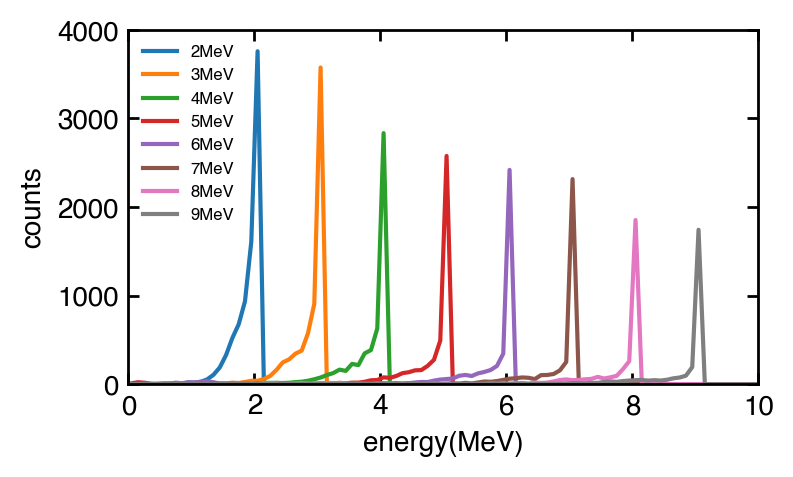

In [93]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO[:,6]+data_2MeV_LO[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO[:,6]+data_3MeV_LO[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO[:,6]+data_4MeV_LO[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO[:,6]+data_5MeV_LO[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO[:,6]+data_6MeV_LO[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO[:,6]+data_7MeV_LO[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO[:,6]+data_8MeV_LO[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO[:,6]+data_9MeV_LO[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



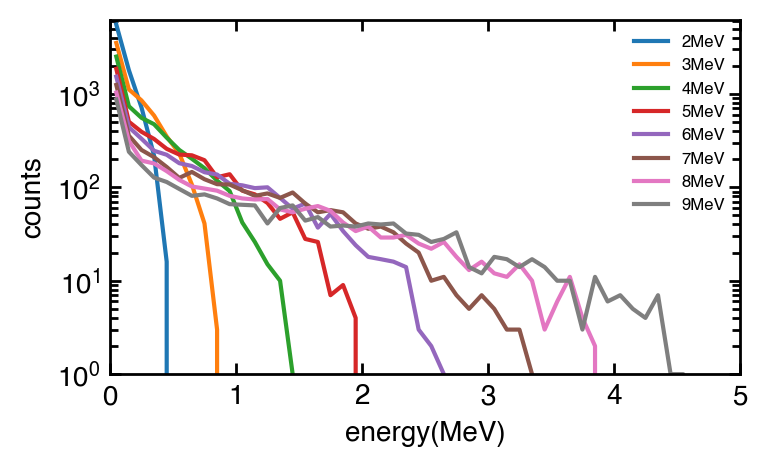

In [100]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,5],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,5],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,5],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,5],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,5],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,5],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,5],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,5],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,5),ylim=(1,6200),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

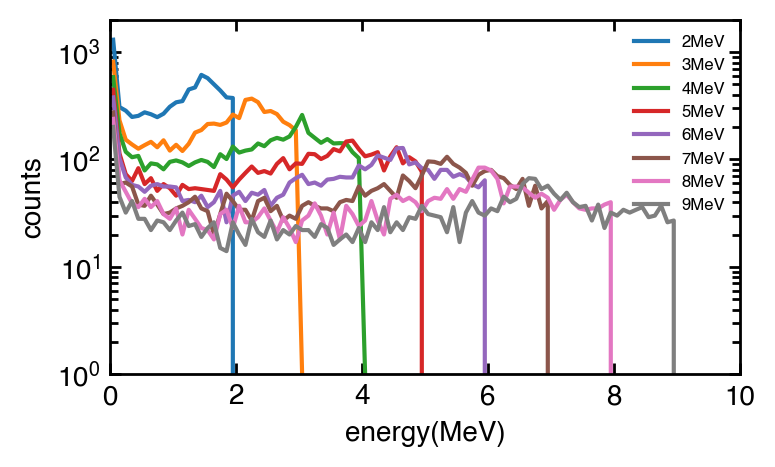

In [98]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

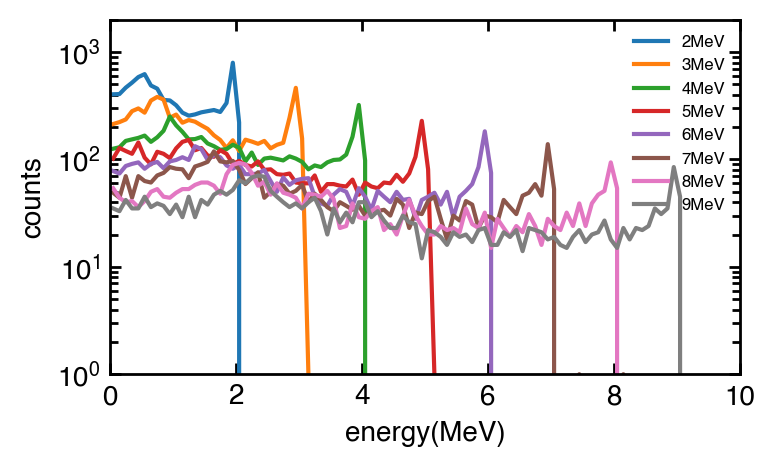

In [103]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")